[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW6.ipynb)

**Problem 1** One of the earliest uses of regression was by Francis Galton who studied genetics. He used regression to predict children's heights based on the heights of their parents. There is an interesting story about it here: https://www.newyorker.com/magazine/2005/01/24/measure-for-measure-5. The following chunk loads in Galton's real data set that he used to determine the relationship between children's and parents heights.

In [1]:
# Run next line if in colab. Or run if need to install library
%pip install pydataset

import pandas as pd
from pydataset import data
heights = pd.DataFrame(data("GaltonFamilies"))
heights

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 29.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939415 sha256=b1b470a24248f9639ad7ee649f64b721c9940e6c8d728dd228999459cf7152ff
  Stored in directory: /root/.cache/pip/wheels/4c/82/ad/f04abc617222b10438b1285ab9b5cfaecd180c10a7c81cff54
Successfully built pydataset
initiated datasets repo at: /root/.pydataset/


,family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,001,78.5,67.0,75.43,4,1,male,73.2
2,001,78.5,67.0,75.43,4,2,female,69.2
3,001,78.5,67.0,75.43,4,3,female,69.0
4,001,78.5,67.0,75.43,4,4,female,69.0
5,002,75.5,66.5,73.66,4,1,male,73.5
...,...,...,...,...,...,...,...,...
930,203,62.0,66.0,66.64,3,1,male,64.0
931,203,62.0,66.0,66.64,3,2,female,62.0
932,203,62.0,66.0,66.64,3,3,female,61.0
933,204,62.5,63.0,65.27,2,1,male,66.5


Part a. Explore the relationship between the target variable, childHeight, and the parents heights. Do not split by gender.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

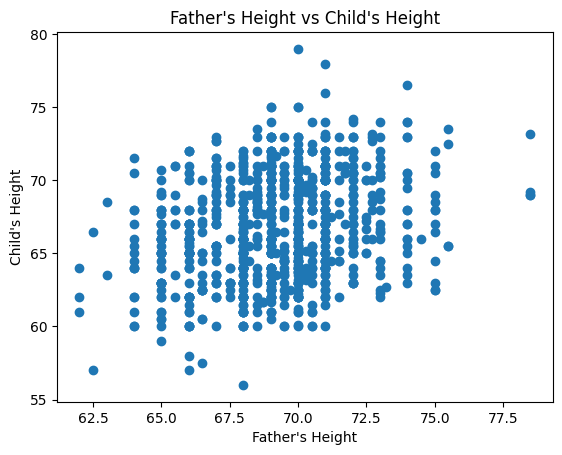

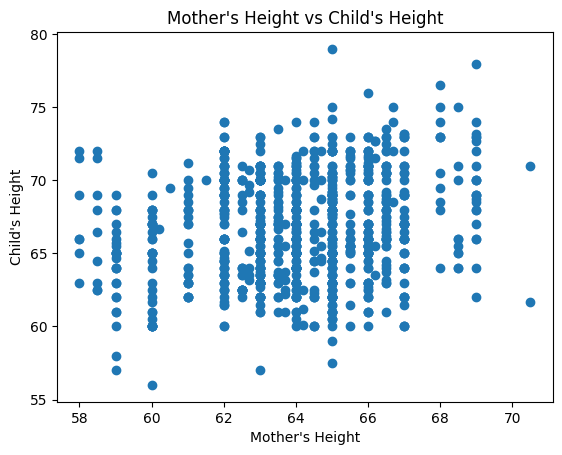

In [3]:
plt.scatter(heights['father'], heights['childHeight'])
plt.xlabel("Father's Height")
plt.ylabel("Child's Height")
plt.title("Father's Height vs Child's Height")
plt.show()

plt.scatter(heights['mother'], heights['childHeight'])
plt.xlabel("Mother's Height")
plt.ylabel("Child's Height")
plt.title("Mother's Height vs Child's Height")
plt.show()


Part b. Explore the relationship again, this time splitting the data set by gender. In other words, repeat part a, but separately for males and females.

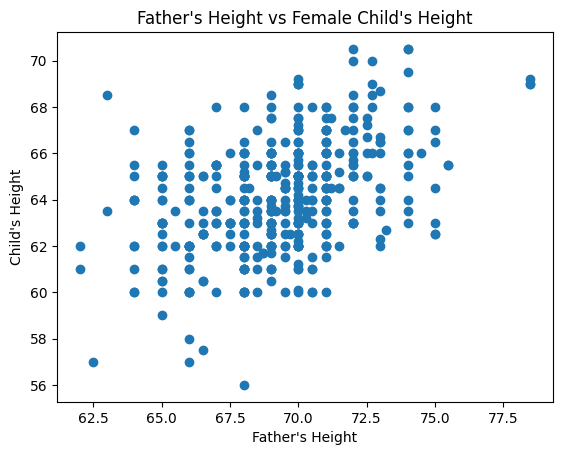

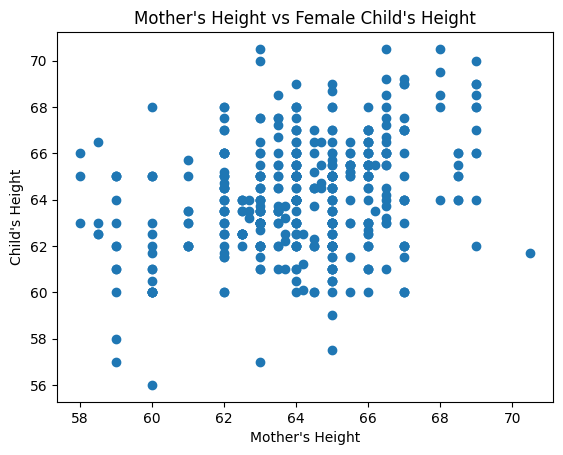

In [4]:
heights_female = heights[heights.gender == "female"]
heights_female

plt.scatter(heights_female['father'], heights_female['childHeight'])
plt.xlabel("Father's Height")
plt.ylabel("Child's Height")
plt.title("Father's Height vs Female Child's Height")
plt.show()

plt.scatter(heights_female['mother'], heights_female['childHeight'])
plt.xlabel("Mother's Height")
plt.ylabel("Child's Height")
plt.title("Mother's Height vs Female Child's Height")
plt.show()

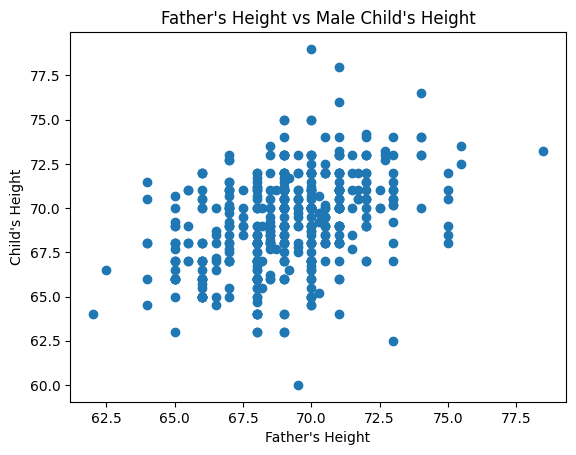

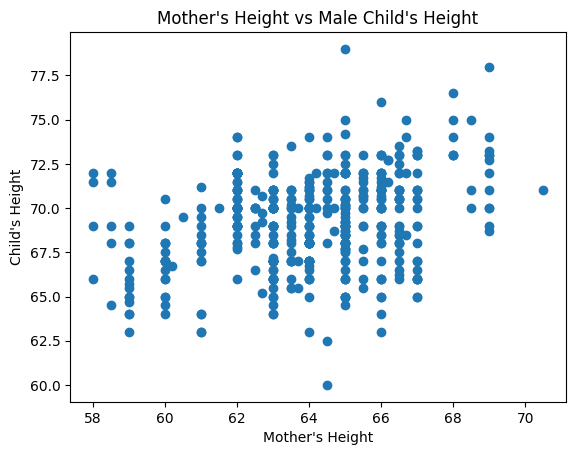

In [5]:
heights_male = heights[heights.gender == "male"]

plt.scatter(heights_male['father'], heights_male['childHeight'])
plt.xlabel("Father's Height")
plt.ylabel("Child's Height")
plt.title("Father's Height vs Male Child's Height")
plt.show()

plt.scatter(heights_male['mother'], heights_male['childHeight'])
plt.xlabel("Mother's Height")
plt.ylabel("Child's Height")
plt.title("Mother's Height vs Male Child's Height")
plt.show()


Part c. Why is separating by gender important for understanding the relationship between child's and parent's heights?

We already know that women are more likely to be shorter which is a genetic difference. If there was a relationship between parent's height and child's height, we would not be able to find the linear relationship if there were two linear lines in our data (as in the same relationship but a few inches taller and a few inches shorter).

**Problem 2**: Continuing with Galton's height data, fit a linear regression model using midparentHeight and gender as variables.

Part a. Write the code to fit the model.

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
predictors = heights[["midparentHeight","gender"]]
X = pd.get_dummies(predictors,drop_first = True)
y = heights["childHeight"]

reg_prep = LinearRegression()
mod_reg = reg_prep.fit(X,y)

print('intercept:', mod_reg.intercept_)
pd.DataFrame(zip(X.columns,mod_reg.coef_))

intercept: 16.514102197606263


,0,1
0,midparentHeight,0.687015
1,gender_male,5.215105


Part b. To include gender as a variable in the model, you needed to create a dummy variable. What is the base level for the variable you created.

I created female as the base level variable since I did first data point as the variable true.

Part c. Interpret both coefficients in the model you created in the context of the problem.

We expect to see the child's height to increase by 0.687 inches when the average parent's height increases by 1 inch holding gender constant. We expect to see the child's height to increase by 5.2 inches when the gender is male compared to female height holding parent's height constant.

**Problem 3** Write code to fit a regression tree for the data.

Part a. Write code to fit the model with a max depth of 3.

In [8]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

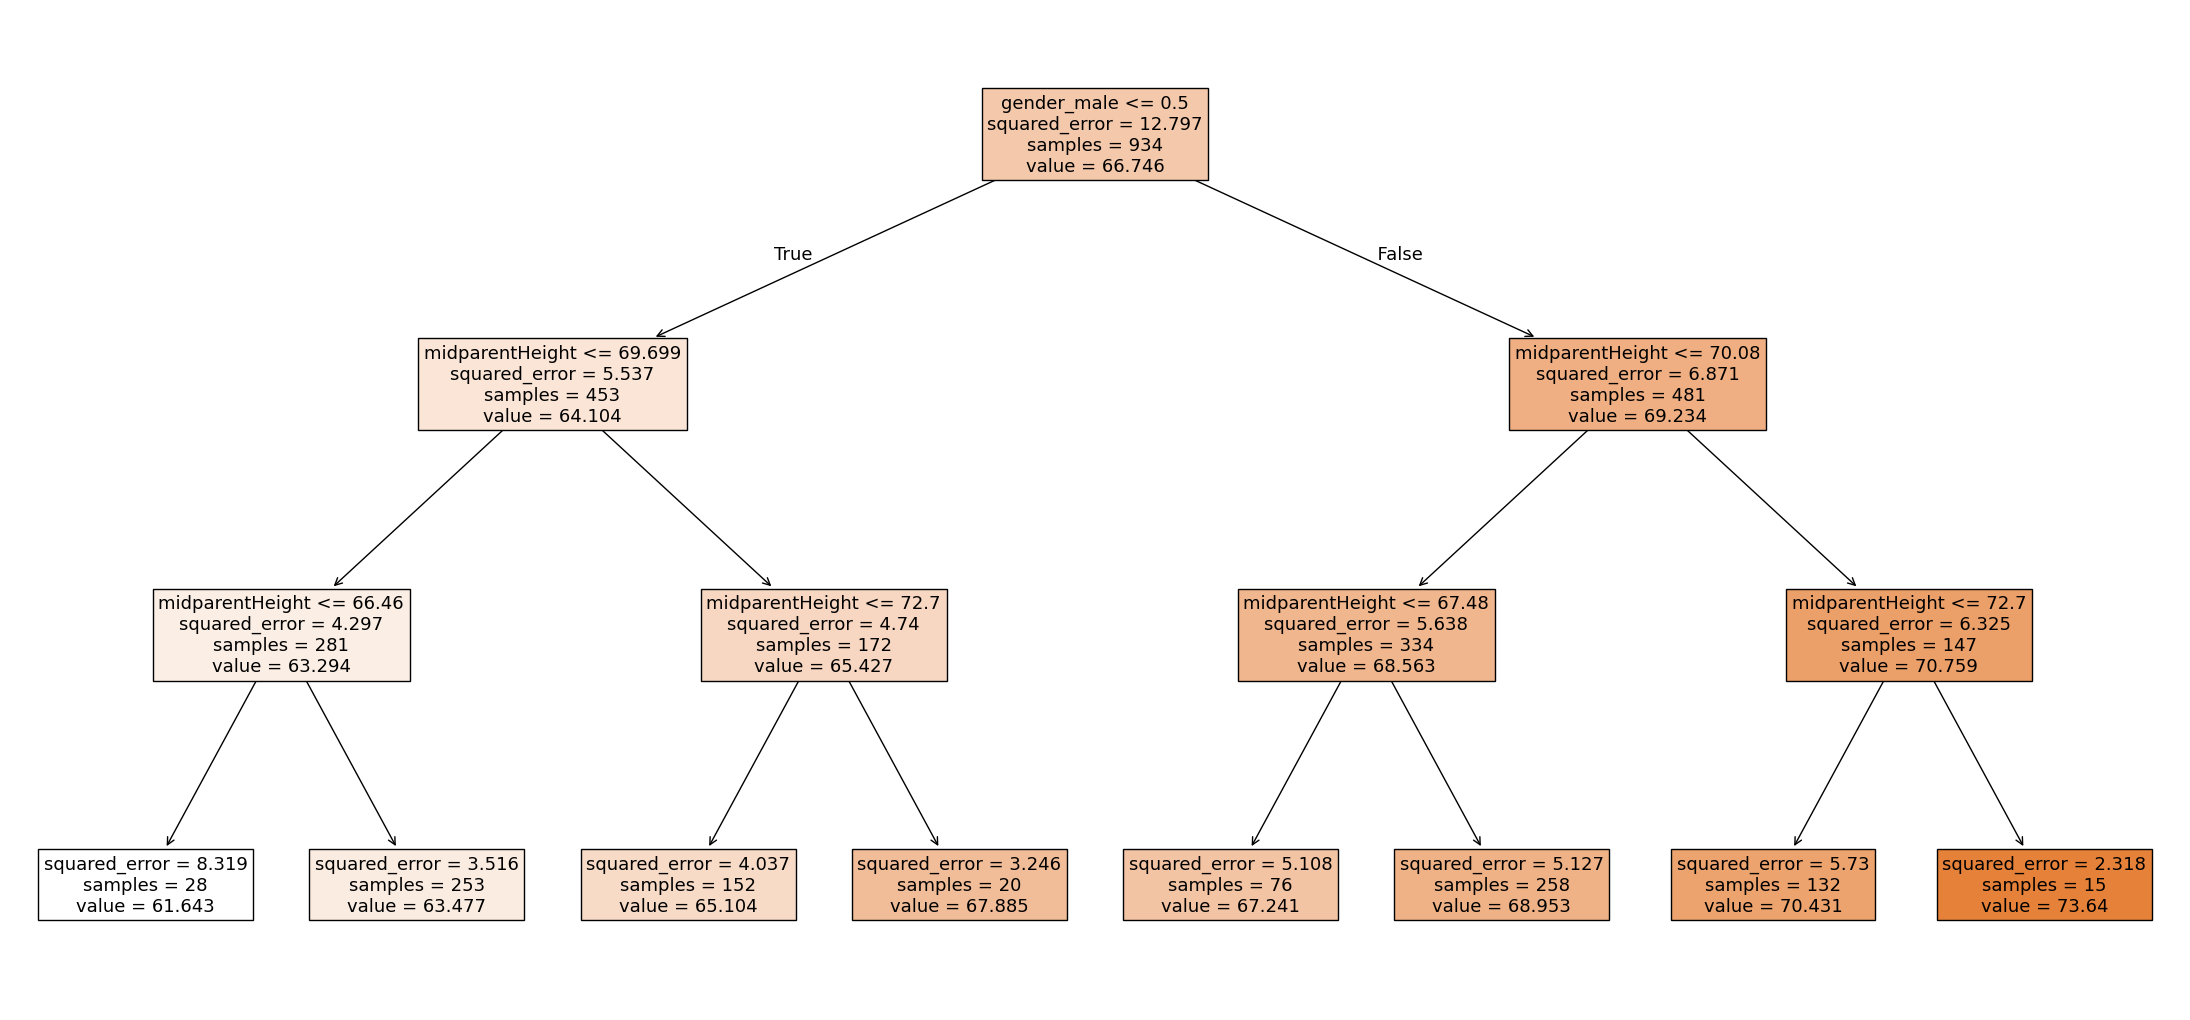

In [9]:
predictors = heights[["midparentHeight", "gender"]]
X = pd.get_dummies(predictors, drop_first=True)
y = heights["childHeight"]

# Initialize and train a decision tree regressor
decision_tree = DecisionTreeRegressor(max_depth=3)
decision_tree.fit(X, y)

# Visualize the tree structure
plt.figure(figsize=(28, 13))
plot_tree(decision_tree, feature_names=X.columns, fontsize=13, filled=True)
plt.show()


Part b. Find any split based on gender. Describe what those splits mean?

There is only one split. The first split shows that any data that has a gender height of less than 5 is true meaning that the left side of the regression tree is expected to be almost all females, and the right side is expected to be almost all males.

**Problem 4**: Insurance companies will use individual characteristics to predict how much an individual will cost in order to reserve enough money on hand to cover expenses. The data set we will use is from Kaggle. You can find it at: https://www.kaggle.com/datasets/mirichoi0218/insurance

The full data set you get from kaggle you can get into Python using

insurance_all = pd.read_csv("https://richardson.byu.edu/220/insurance_all.csv")

Use this dataset to answer the remainder of the questions on the homework.

In [10]:
insurance_all = pd.read_csv("https://richardson.byu.edu/220/insurance_all.csv")
insurance_all

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Part a. For each variable in the data set, list if it is continuous or categorical. If categorical specify if it is binary or not and list each value it can have.

*   Continuous: age, bmi, charges
*   Categorical: sex, children, smoker, region
*   Binary: sex, smoker
*   Children: six values [0, 1, 2, 3, 4, 5] (this one was iffy for categorical, but it is counted and cannot be a fraction, so I counted it as categorical)
*   Region: four values [northeast, northwest, southeast, southwest]


Part b. Do an exploratory analysis of the data. charges is the target variable and the rest are predictors. Use figures to explore the relationship between the predictor variables in the data and charges.

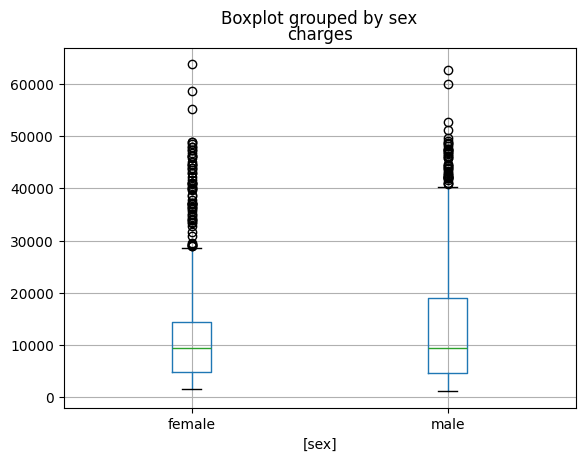

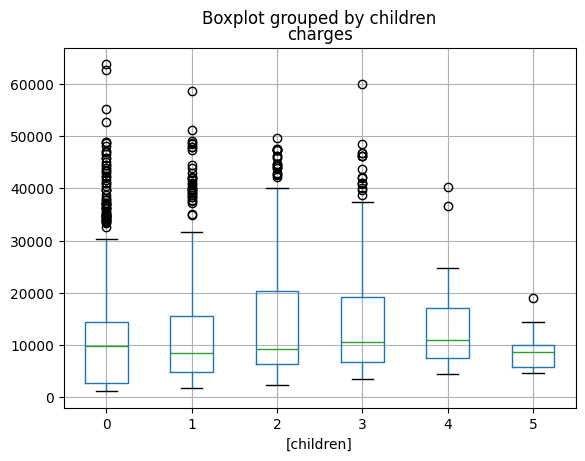

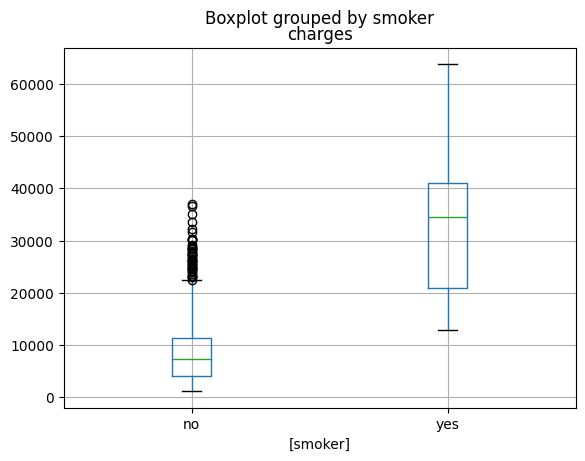

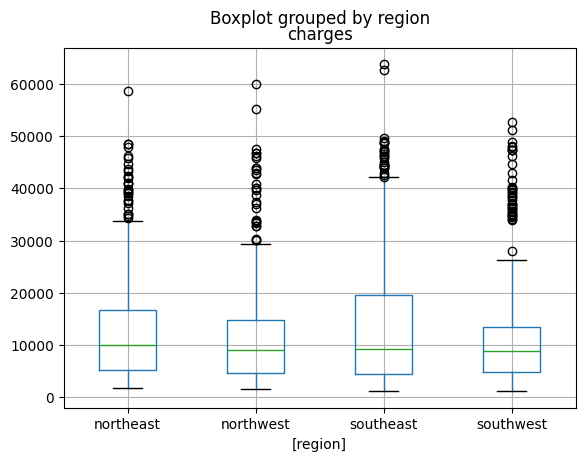

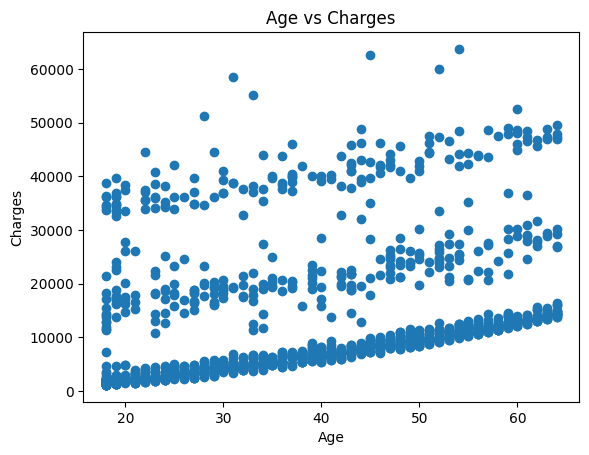

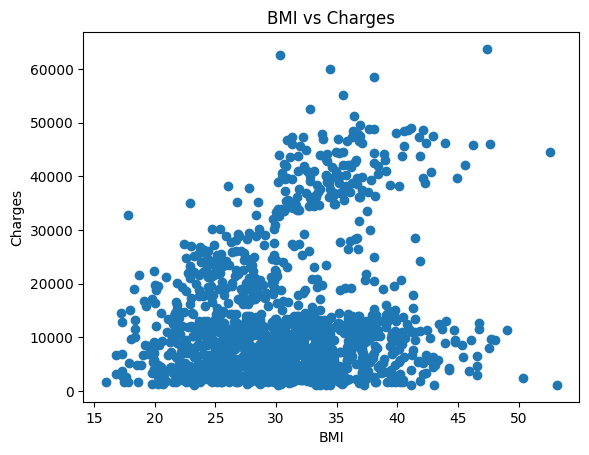

In [11]:
insurance_all[["sex","charges"]].boxplot(by="sex")
plt.show()

insurance_all[["children","charges"]].boxplot(by="children")
plt.show()

insurance_all[["smoker","charges"]].boxplot(by="smoker")
plt.show()

insurance_all[["region","charges"]].boxplot(by="region")
plt.show()

plt.scatter(insurance_all.age, insurance_all.charges)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Age vs Charges")
plt.show()

plt.scatter(insurance_all.bmi, insurance_all.charges)
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("BMI vs Charges")
plt.show()

Part c. Write the code that fits a linear regression model to the data, predicting charges from the other variables.

In [12]:
predictors = insurance_all[["age","sex","bmi","children", "smoker", "region"]]
X = pd.get_dummies(predictors,drop_first = True)
y = insurance_all["charges"]
reg_prep = LinearRegression()

mod_reg = reg_prep.fit(X,y)

print('intercept:', mod_reg.intercept_)
pd.DataFrame(zip(X.columns,mod_reg.coef_))

intercept: -11938.538576167146


,0,1
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,sex_male,-131.314359
4,smoker_yes,23848.534542
5,region_northwest,-352.963899
6,region_southeast,-1035.022049
7,region_southwest,-960.050991


Part d. For each categorical variable in the original data set, report what variables have been created to represent it in the data we use in the regression model. Report what the base level is for each categorical variable.

I used a dummy variable to represent the categorial variables and turn them into binary values of 0 and 1.  

*   Children: I did not use the dummy variable since it is numerical
*   Sex: I chose female as the base variable
*   Smoker: I chose no as the base variable
*   Region: I choose northeast as the base variable

Part e. Explain how the effect of age is interpreted in the regression model.

Holding all else constant, when age is increased by 1 year, the insurance charge is expected to increase by $257.

Part f. Explain how the effect of smoking is interpreted in the regression model.

Holding all else constant, when the person is a smoker, their insurance is expected to be increased by $23,849 compared to a non-smoker.

Part g. Explain how the effect of region is interpreted in the regression model.

Each region's coefficent is showing the increase or decrease of insurance compared to northeast holding all else constant. Northwest is -353, Southeast is -1035, and Southwest is -960 compared to Northeast.

**Problem 5** Run the following code, which splits the outcome variable into high charges and low charges.

In [13]:
# targets from insurance['charges'] only
import pandas as pd
insurance_all = pd.read_csv("https://richardson.byu.edu/220/insurance_all.csv")

import numpy as np
import pandas as pd

m = insurance_all['charges'].median()
insurance_all['cost_bin2'] = np.where(insurance_all['charges'] <= m, 'low', 'high')

q33, q67 = insurance_all['charges'].quantile([0.33, 0.67]).values
insurance_all['cost_bin3'] = pd.cut(
    insurance_all['charges'],
    bins=[-np.inf, q33, q67, np.inf],
    labels=['low', 'med', 'high']
)


Part a. Fit a logistic regression model with `cost_bin2` as the target variable.

In [19]:
from sklearn.linear_model import LogisticRegression

predictors = insurance_all[["age","sex","bmi","children", "smoker", "region"]]
X = pd.get_dummies(predictors,drop_first = True)
target = insurance_all["cost_bin2"]
y = pd.get_dummies(target, drop_first = True)

log_reg_prep = LogisticRegression(max_iter=1000)
mod_log_reg = log_reg_prep.fit(X,y.values.ravel())

print('intercept:', mod_log_reg.intercept_)
pd.DataFrame(zip(X.columns,mod_log_reg.coef_[0]))

intercept: [7.47985699]


,0,1
0,age,-0.152434
1,bmi,-0.030320
2,children,-0.104442
3,sex_male,0.296379
4,smoker_yes,-6.485167
5,region_northwest,0.325773
6,region_southeast,0.707318
7,region_southwest,0.635571


Part b. Interpret the coefficient associated with `age`

Holding all else constant, if age increases by 1, then the odds of the insurance price being high goes down by 0.152.

Part c. Fit a classification tree for `cost_bin2` with a max depth of 3.

In [31]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree_bin = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_bin.fit(X, y)


DecisionTreeClassifier(max_depth=3, random_state=42)

Part d. Print the tree.

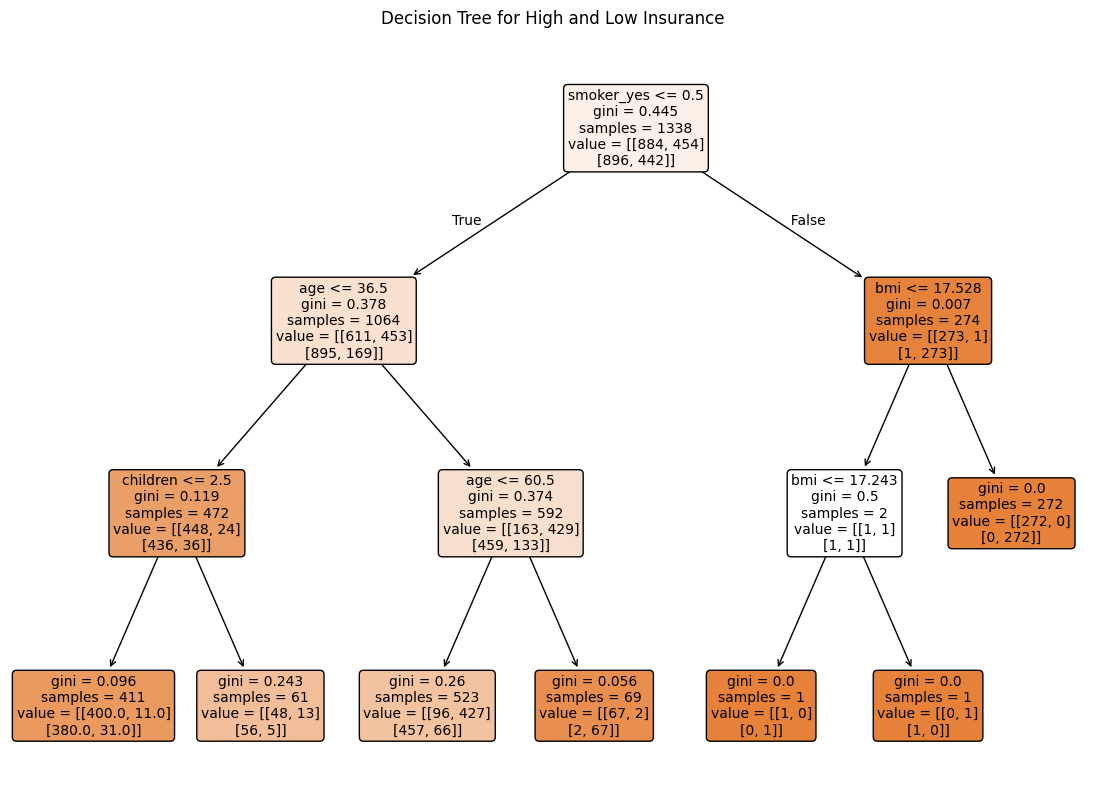

In [32]:
plt.figure(figsize=(14, 10))
plot_tree(
    tree_bin,
    feature_names=X.columns,
    class_names=["low", "high"],
    filled=True,
    rounded=True,
    fontsize = 10
)
plt.title("Decision Tree for High and Low Insurance")
plt.show()

Part e. Fit a a classification tree for the target variable with 3 bins, called `cost_bin3` with a max depth of 3 and print the resulting tree.

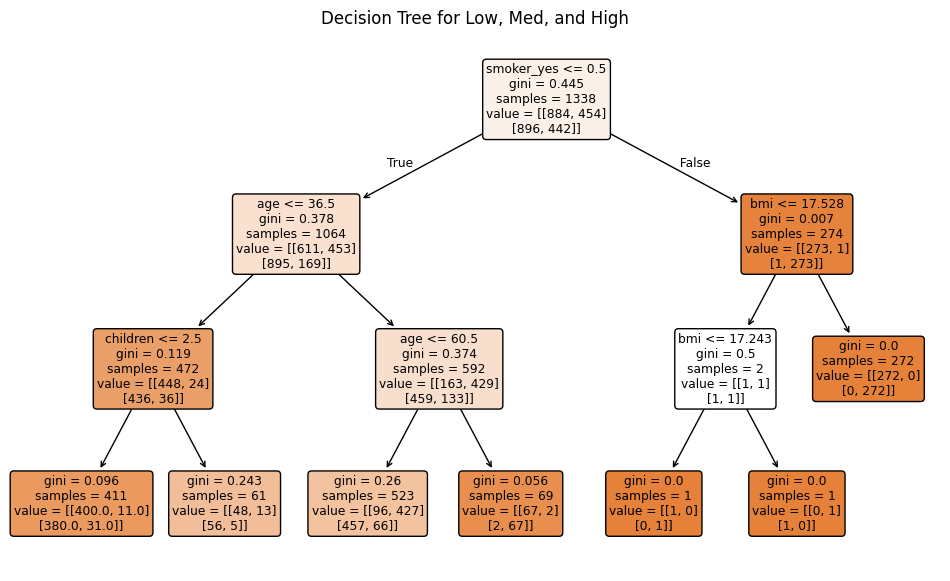

In [30]:
tree_bin = DecisionTreeClassifier(max_depth=3, random_state=42)

target2 = insurance_all["cost_bin3"]
y = pd.get_dummies(target2, drop_first = True)

tree_multi = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_multi.fit(X, y)

# Plot the tree
plt.figure(figsize=(12, 7))
plot_tree(
    tree_multi,
    feature_names=X.columns,
    class_names=['low', 'med', 'high'],
    filled=True,
    rounded=True
)
plt.title("Decision Tree for Low, Med, and")
plt.show()